In [2]:
import cv2
import pandas as pd
import numpy as np
from sklearn import svm

In [3]:
import os

train_img_list= os.listdir('train')
print(f"Total Trained Images are {len(train_img_list)}")

Total Trained Images are 25000


In [4]:
import re 

Cats = [i for i in train_img_list if re.match('cat',i)]
print(f"{len(Cats)} Cats images")

Dogs = [ i for i in train_img_list if re.match('dog',i)]
print(f"{len(Dogs)} Dogs images")

12500 Cats images
12500 Dogs images


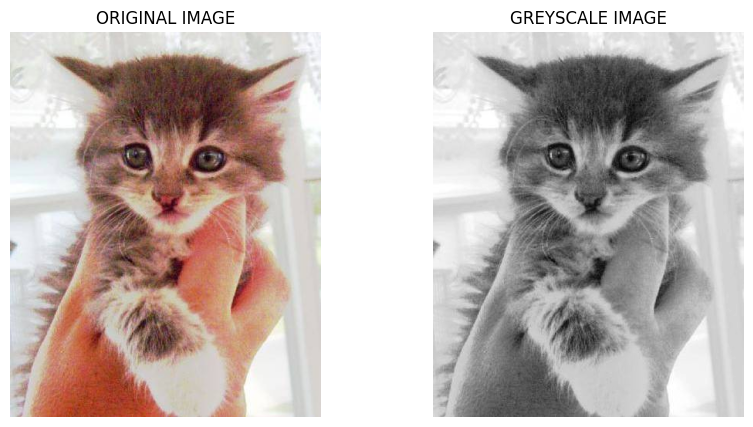

In [5]:
from skimage import io, color, transform
import matplotlib.pyplot as plt
import gc

cat_img = io.imread(os.path.join('train', Cats[3]))
cat_img_grey = color.rgb2gray(cat_img)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(cat_img,cmap='gray')
plt.title('ORIGINAL IMAGE')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(cat_img_grey,cmap='gray')
plt.title('GREYSCALE IMAGE')
plt.axis('off')

plt.show()

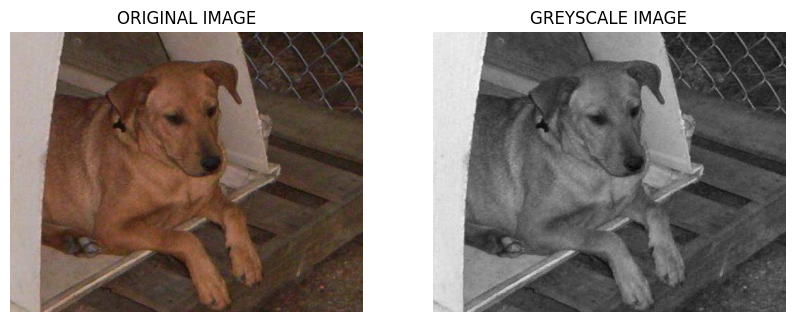

In [6]:
dog_img = io.imread(os.path.join('train', Dogs[3]))
dog_img_grey = color.rgb2gray(dog_img)

plt.figure(figsize=(10,5))
plt.subplot(1 ,2 ,1)
plt.imshow(dog_img,cmap='gray')
plt.title('ORIGINAL IMAGE')
plt.axis('off')

plt.subplot(1 ,2 ,2)
plt.imshow(dog_img_grey,cmap='gray')
plt.title('GREYSCALE IMAGE')
plt.axis('off')

plt.show()

In [7]:
# 0 for cats and 1 for dogs
features=np.array([])
Cat_label_0=np.full(12500,0)
Dog_label_1=np.full(12500,1)

print(f"{Cat_label_0} This 0 label means Cat")
print(f"{Dog_label_1} This 1 label means Dog")

labels= np.append(np.full(12500,0),np.full(12500,1))


[0 0 0 ... 0 0 0] This 0 label means Cat
[1 1 1 ... 1 1 1] This 1 label means Dog


In [8]:
cat_folder = []
for img in Cats:

    normal_img = io.imread(os.path.join('train',img))
    gray_img = color.rgb2gray(normal_img)
    resize_img = transform.resize(gray_img,(50,50))
    normalize_img = resize_img / 250.0
    flat = normalize_img.flatten() ## Flatten The images in array
    cat_folder.append(flat)
    
features = np.vstack(cat_folder)
del cat_folder
gc.collect()

print('Loaded Cat images Successfully..!')

Loaded Cat images Successfully..!


In [9]:
dog_folder = []

for img in Dogs:
    normal_img = io.imread(os.path.join('train', img))
    gray_img = color.rgb2gray(normal_img)
    resize_img = transform.resize(gray_img,(50,50))
    normalize_img = resize_img / 250.0
    flat = normalize_img.flatten()
    dog_folder.append(flat)

features = np.append(features,dog_folder,axis=0)
del dog_folder
gc.collect()

print('Loaded Dog images Successfully..!')

Loaded Dog images Successfully..!


In [10]:
from sklearn.decomposition import PCA

print('Applyaing Principle Component Analysis')

pca= PCA(n_components=0.9)

pca.fit(features)
principle_features = pca.transform(features)

print(f"The features are reduces from {len(features[0])} to {len(principle_features[0])}")

del features
gc.collect()

print('Principle Component Analysis Completed')


Applyaing Principle Component Analysis
The features are reduces from 2500 to 100
Principle Component Analysis Completed


In [11]:
from sklearn.model_selection import train_test_split, GridSearchCV
import joblib

X_train,X_test,Y_train,Y_test=train_test_split(principle_features,labels,test_size=0.3,random_state=1580,stratify=labels)

del principle_features
del labels
gc.collect()

0

In [12]:
param_grid = {'C': [0.1, 1, 10], 'gamma': [0.01, 0.1, "scale"]}

# Creating a support vector classifier
svc = svm.SVC(kernel="rbf", probability=True)

# Creating a model using GridSearchCV with the parameters grid
model = GridSearchCV(svc, param_grid, cv=2, verbose=3)

In [13]:
print("model training started ...")
model.fit(X_train, Y_train)
print("model training completed")

joblib.dump(model, "C:/Users/vinma/OneDrive/Desktop/INTERSHIP/Prodigy-Infotech/Task-3/image_classifier_svm.sav")
del X_train
del Y_train
gc.collect()
print("model artifact saved")

model training started ...
Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV 1/2] END .................C=0.1, gamma=0.01;, score=0.546 total time= 2.4min
[CV 2/2] END .................C=0.1, gamma=0.01;, score=0.522 total time= 2.3min
[CV 1/2] END ..................C=0.1, gamma=0.1;, score=0.546 total time= 2.9min
[CV 2/2] END ..................C=0.1, gamma=0.1;, score=0.521 total time= 3.2min
[CV 1/2] END ................C=0.1, gamma=scale;, score=0.624 total time= 2.4min
[CV 2/2] END ................C=0.1, gamma=scale;, score=0.617 total time= 2.5min
[CV 1/2] END ...................C=1, gamma=0.01;, score=0.546 total time= 3.1min
[CV 2/2] END ...................C=1, gamma=0.01;, score=0.522 total time= 3.0min
[CV 1/2] END ....................C=1, gamma=0.1;, score=0.546 total time= 2.9min
[CV 2/2] END ....................C=1, gamma=0.1;, score=0.521 total time= 3.0min
[CV 1/2] END ..................C=1, gamma=scale;, score=0.646 total time= 3.8min
[CV 2/2] END .........

In [56]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,ConfusionMatrixDisplay

y_pred = model.predict(X_test)

ac=accuracy_score(y_pred,Y_test)
print(f"The model {ac*100:.2f}% accurate.")

The model 65.43% accurate.


In [15]:
print("Classification Report :-")

print(classification_report(y_pred, Y_test, target_names=['cat','dog']))

Classification Report :-
              precision    recall  f1-score   support

         cat       0.63      0.66      0.65      3579
         dog       0.68      0.65      0.66      3921

    accuracy                           0.65      7500
   macro avg       0.65      0.65      0.65      7500
weighted avg       0.66      0.65      0.65      7500



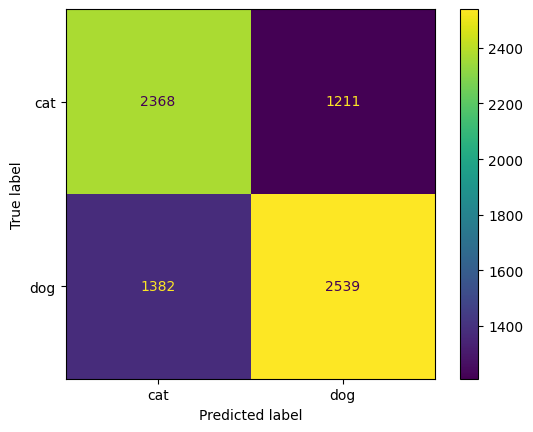

In [16]:
cm = confusion_matrix(y_pred,Y_test)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['cat','dog'])
cm_display.plot()
plt.show()

In [17]:
Test_img_list = sorted(os.listdir('test1'))
print(f"Total Test images are {len(Test_img_list)}")

Total Test images are 12500


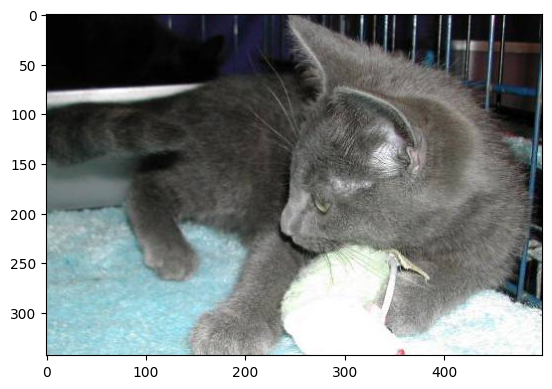

Cat = 68.03%
Dog = 31.97%
This image is of a Cat


In [58]:
img = io.imread(os.path.join('test1',Test_img_list[2]))
plt.imshow(img)
plt.show()

gray_img = color.rgb2gray(img)
resize_img = transform.resize(gray_img,(50,50))
normalize_img = resize_img / 250.0
flat = normalize_img.flatten()
principle_features = pca.transform([flat])
probability = model.predict_proba(principle_features)[0]

print(f"Cat = {probability[0]*100:.2f}%")
print(f"Dog = {probability[1]*100:.2f}%")

if model.predict(principle_features)[0] == 0:
    print("This image is of a Cat")
else:
    print("This image is of a Dog")


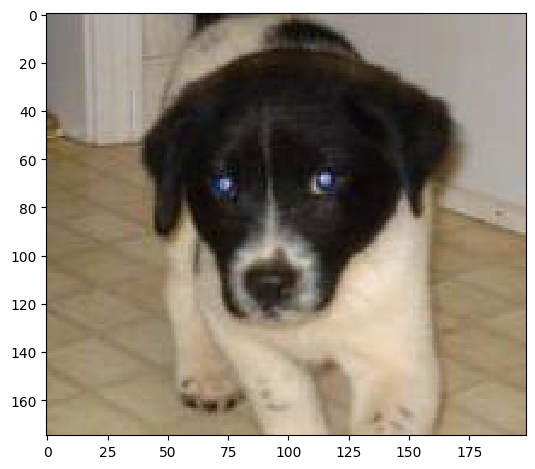

Cat = 30.14%
Dog = 69.86%
This image is of a Dog


In [55]:
img = io.imread(os.path.join('test1',Test_img_list[3245]))
io.imshow(img)
plt.show()

gray_img = color.rgb2gray(img)
resize_img = transform.resize(gray_img,(50,50))
normalize_img = resize_img / 250.0
flat = normalize_img.flatten()

principle_features = pca.transform([flat])
probability= model.predict_proba(principle_features)[0]

print(f"Cat = {probability[0]*100:.2f}%")
print(f"Dog = {probability[1]*100:.2f}%")

if model.predict(principle_features)[0] == 0:
    print('This image is of a Cat')
else:
    print('This image is of a Dog')
